<a href="https://colab.research.google.com/github/SainiManisha/Convnet-Tutorial/blob/master/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Library and Packages**

In [0]:
import matplotlib.pyplot as plt
import numpy as np

**Import Dataset**

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print('train_images shape',train_images.shape)
print('train_labels shape',train_labels.shape)

train_images shape (50000, 32, 32, 3)
train_labels shape (50000, 1)


In [4]:
print('test_images shape',test_images.shape)
print('test_labels shape',test_labels.shape)

test_images shape (10000, 32, 32, 3)
test_labels shape (10000, 1)


**Normalize the Data**

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
print('train_images shape',train_images.shape)
print('test_images shape',test_images.shape)

train_images shape (50000, 32, 32, 3)
test_images shape (10000, 32, 32, 3)


**Change the class Label using one hot encoding**

In [0]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
print('train_images shape',train_labels.shape)
print('test_images shape',test_labels.shape)

train_images shape (50000, 10)
test_images shape (10000, 10)


In [9]:
print(train_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


**Build the model for feature extraction**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        name='C1',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), 
                              name='M2'))
model.add(layers.Conv2D(64, (3, 3), 
                        name='C3', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), name='M4'))
model.add(layers.Conv2D(64, (3, 3), 
                        activation='relu', name='C5'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 15, 15, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 13, 13, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**Adding a classifier on top of the convnet**



In [0]:
model.add(layers.Flatten(name='F6'))
model.add(layers.Dense(64, activation='relu', name='FC7'))
model.add(layers.Dense(10, activation='softmax', name='FC8'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 15, 15, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 13, 13, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 4, 4, 64)          36928     
_________________________________________________________________
F6 (Flatten)                 (None, 1024)              0         
_________________________________________________________________
FC7 (Dense)                  (None, 64)                6

**Compile and run the Model**

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 4s 11ms/step - loss: 1.7533 - accuracy: 0.3608
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.3829 - accuracy: 0.5072
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 1.2082 - accuracy: 0.5758
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0843 - accuracy: 0.6217
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.9894 - accuracy: 0.6531
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.9104 - accuracy: 0.6836
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 0.8460 - accuracy: 0.7063
Epoch 8/10
391/391 [==============================] - 4s 10ms/step - loss: 0.7908 - accuracy: 0.7235
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 0.7400 - accuracy: 0.7431
Epoch 10/10
391/391 [==============================] - 4s 11ms/step - loss: 0.6955 - accura

**Evaluate the Model**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
test_acc

0.6754000186920166

**To improve the accuracy create the second Model1**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), 
                        activation='relu', 
                        name='C1',
                        input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2), 
                              name='M2'))
model1.add(layers.Conv2D(64, (3, 3), 
                        name='C3', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2), name='M4'))
model1.add(layers.Conv2D(64, (3, 3), 
                        activation='relu', name='C5'))

model1.add(layers.Flatten(name='F6'))
model1.add(layers.Dense(64, activation='relu', name='FC7'))
model1.add(layers.Dense(10, activation='softmax', name='FC8'))

**Compile  and train the Model1**

In [0]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 4s 13ms/step - loss: 1.7311 - accuracy: 0.3619 - val_loss: 1.4684 - val_accuracy: 0.4783
Epoch 2/10
274/274 [==============================] - 3s 12ms/step - loss: 1.3870 - accuracy: 0.4997 - val_loss: 1.3285 - val_accuracy: 0.5221
Epoch 3/10
274/274 [==============================] - 3s 12ms/step - loss: 1.2477 - accuracy: 0.5567 - val_loss: 1.2465 - val_accuracy: 0.5629
Epoch 4/10
274/274 [==============================] - 3s 12ms/step - loss: 1.1348 - accuracy: 0.6006 - val_loss: 1.1458 - val_accuracy: 0.5996
Epoch 5/10
274/274 [==============================] - 3s 12ms/step - loss: 1.0642 - accuracy: 0.6245 - val_loss: 1.0581 - val_accuracy: 0.6313
Epoch 6/10
274/274 [==============================] - 3s 12ms/step - loss: 0.9914 - accuracy: 0.6543 - val_loss: 1.0781 - val_accuracy: 0.6283
Epoch 7/10
274/274 [==============================] - 3s 12ms/step - loss: 0.9425 - accuracy: 0.6718 - val_loss: 1.0181 - val_accuracy: 0.6445

**Evalauate the Model1**

In [20]:
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=0)
test_acc

0.6765999794006348

**Plot the Graph of Accuracy and Loss in case of Model1**





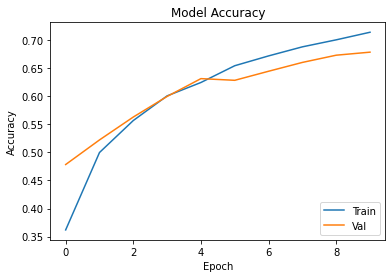

In [21]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train', 'Val'],loc='lower right')
plt.show()

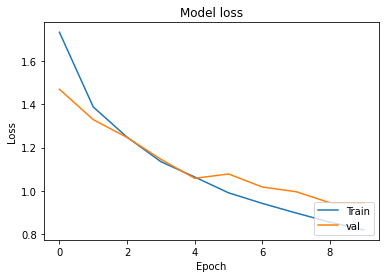

In [22]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend(['Train','val'], loc='lower right')
plt.show()

In [23]:
test_images_ss = test_images[:25]
test_images_ss.shape

(25, 32, 32, 3)

**Save the Model for re-use**

In [0]:
model.save('cifar_model.h5')

**Re-use the saved Model**

In [25]:
from tensorflow.keras.models import load_model
model = load_model('cifar_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
M2 (MaxPooling2D)            (None, 15, 15, 32)        0         
_________________________________________________________________
C3 (Conv2D)                  (None, 13, 13, 64)        18496     
_________________________________________________________________
M4 (MaxPooling2D)            (None, 6, 6, 64)          0         
_________________________________________________________________
C5 (Conv2D)                  (None, 4, 4, 64)          36928     
_________________________________________________________________
F6 (Flatten)                 (None, 1024)              0         
_________________________________________________________________
FC7 (Dense)                  (None, 64)                6

In [26]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activation_model.outputs

[<tf.Tensor 'C1_2/Identity:0' shape=(None, 30, 30, 32) dtype=float32>,
 <tf.Tensor 'M2_2/Identity:0' shape=(None, 15, 15, 32) dtype=float32>,
 <tf.Tensor 'C3_2/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'M4_2/Identity:0' shape=(None, 6, 6, 64) dtype=float32>,
 <tf.Tensor 'C5_2/Identity:0' shape=(None, 4, 4, 64) dtype=float32>]

In [27]:
sample_test_image = np.expand_dims(train_images[10], axis=0)
sample_test_image.shape

(1, 32, 32, 3)

In [28]:
activations = activation_model.predict(sample_test_image)
print(activations)
len(activations)

[array([[[[5.7035796e-03, 0.0000000e+00, 0.0000000e+00, ...,
          2.6675239e-03, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [9.9639744e-03, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [2.4019189e-02, 0.0000000e+00, 0.0000000e+00, ...,
          2.8531067e-02, 0.0000000e+00, 0.0000000e+00],
         [1.7238781e-02, 0.0000000e+00, 0.0000000e+00, ...,
          2.6900660e-02, 0.0000000e+00, 0.0000000e+00],
         [1.6510341e-02, 0.0000000e+00, 0.0000000e+00, ...,
          2.4279550e-02, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          3.5994435e-03, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [7.6937750e-03, 0.0000000e+00, 0.0000000e+00, 

5

In [29]:
layer_names = [layer.name for layer in model.layers[:5]]
layer_names

['C1', 'M2', 'C3', 'M4', 'C5']




C1


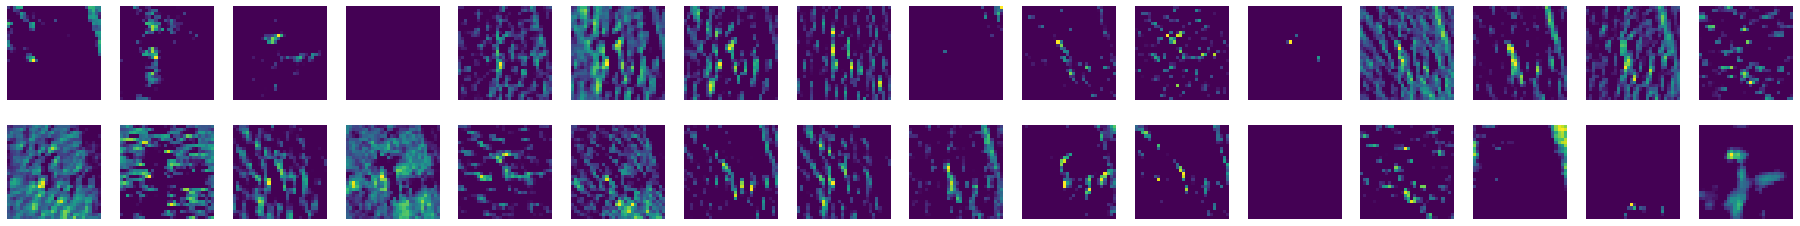




M2


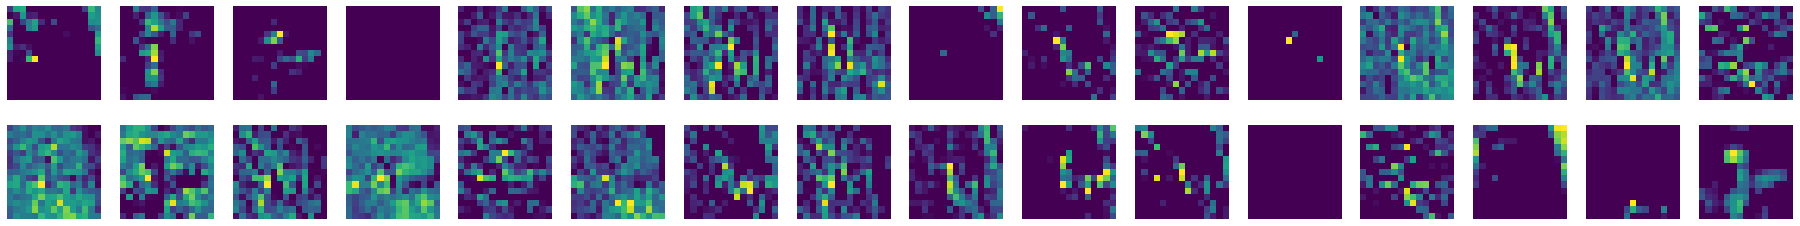




C3


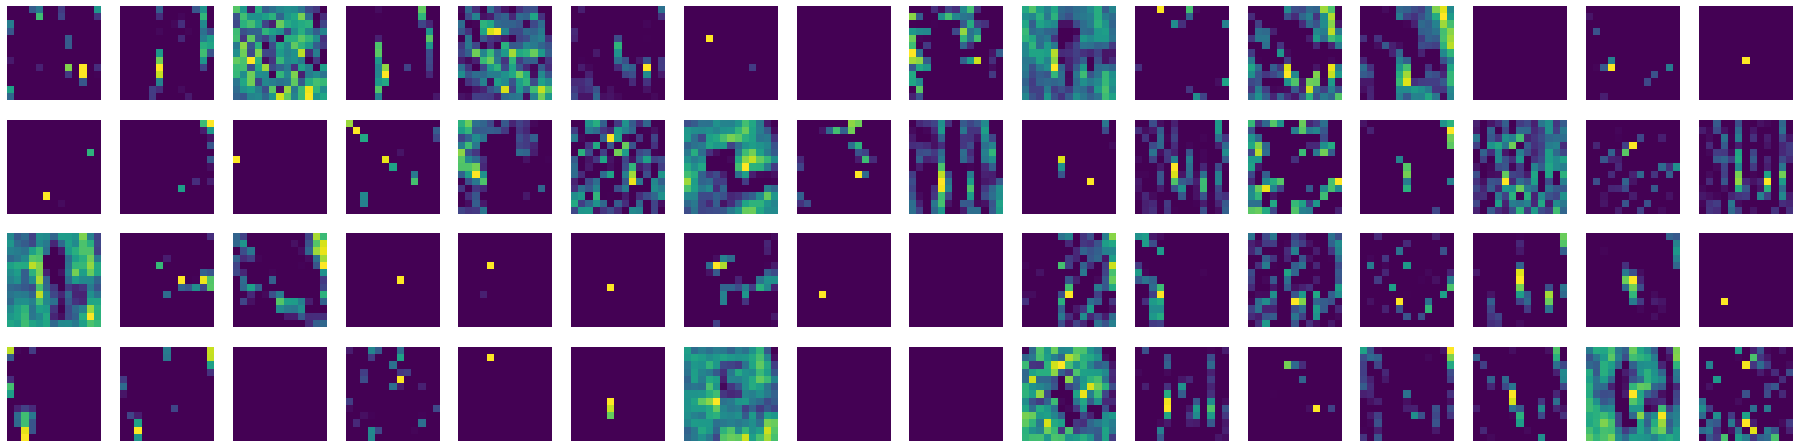




M4


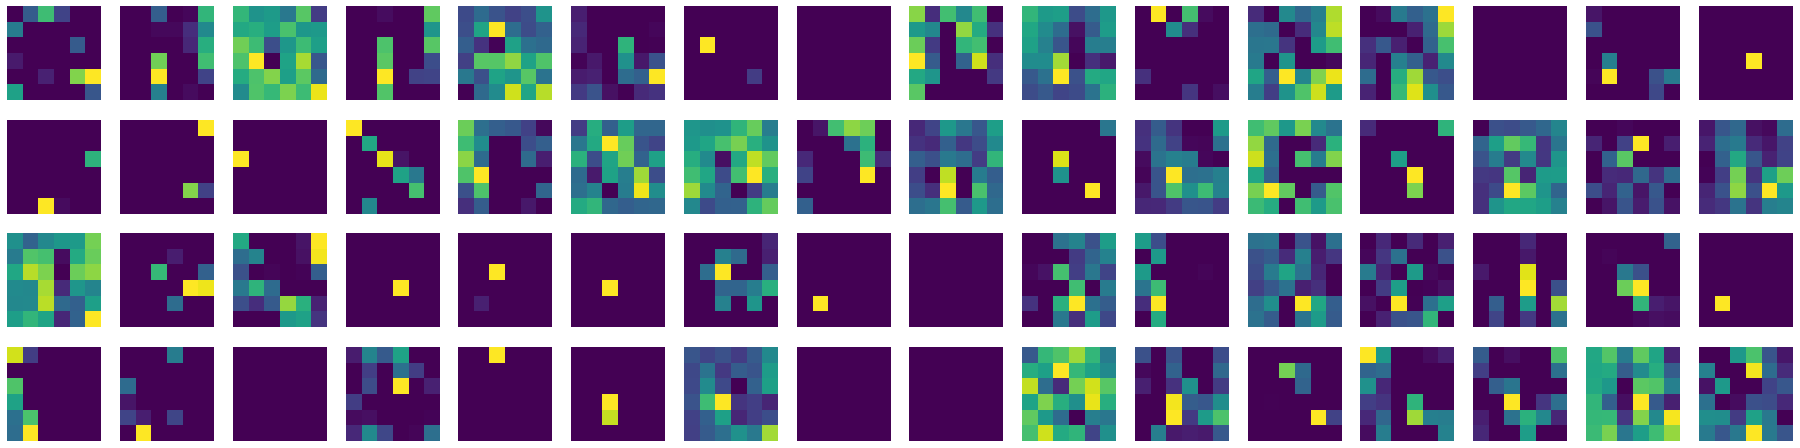




C5


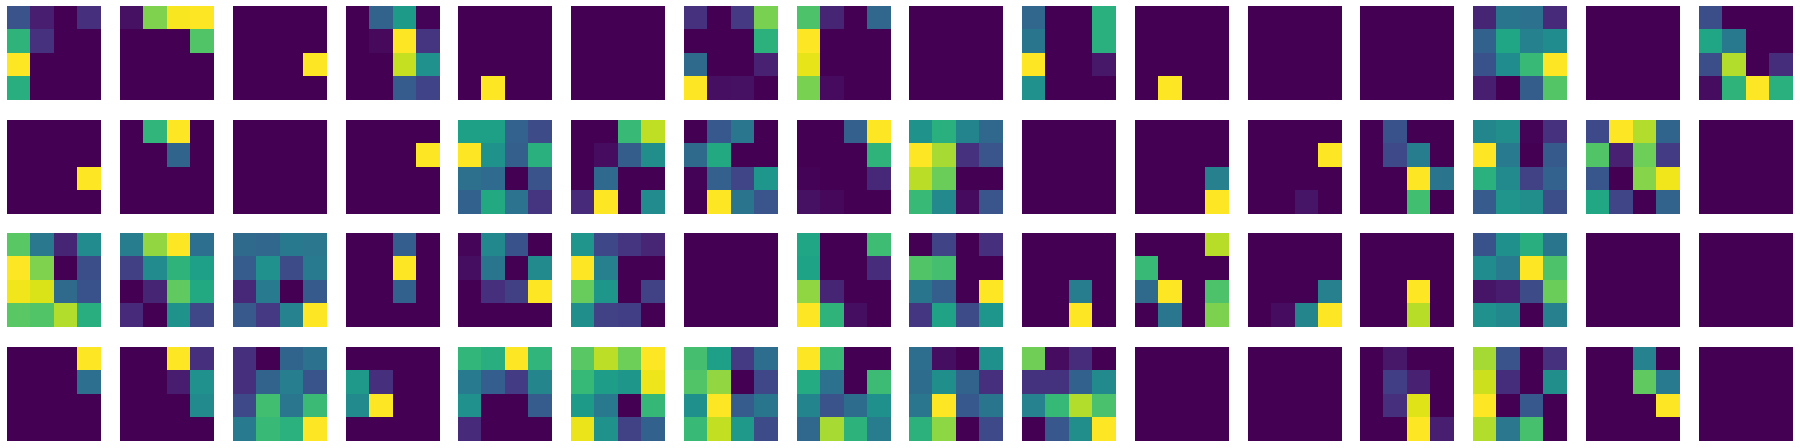

In [30]:
col_size = 16

for layer_name, activation in zip(layer_names, activations):
    max_val = activation.max()
    activation /= max_val

    num_filters = activation.shape[-1]
    row_size = num_filters / col_size

    print("\n" * 2)
    print(layer_name)
    plt.figure(figsize=[col_size * 2, row_size * 2])
    for index in range(num_filters):
        plt.subplot(row_size, col_size, index + 1)
        plt.imshow(activation[0, :, :, index])
        plt.axis("off")
    plt.show()

**Predict the class label of the test Images**

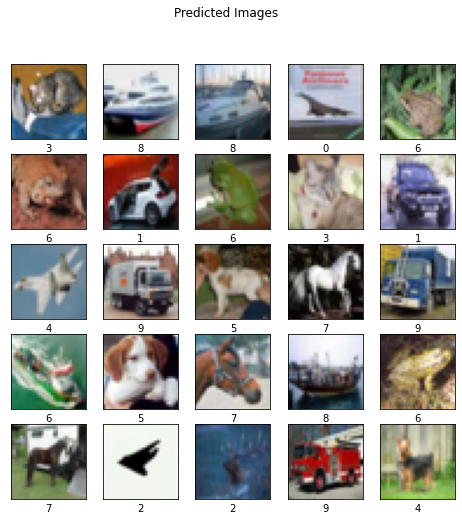

In [31]:
i = 0

plt.figure(figsize=[8, 8])	

predicted = model1.predict(test_images_ss)

for	(image,	label) in zip(test_images_ss, predicted):	
	label = np.argmax(label)
	plt.subplot(5, 5, i + 1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(image, cmap=plt.cm.binary)
	plt.xlabel(label)
	i += 1
plt.suptitle("Predicted Images")
plt.show()

**Confusion Matrix**

In [32]:
!pip install scikit-plot

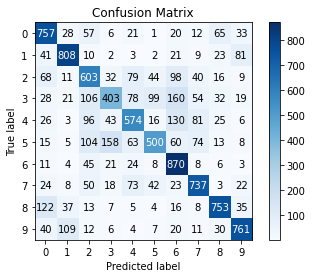

In [33]:
from scikitplot.metrics import plot_confusion_matrix

logits = model1.predict(test_images)
predicted = np.argmax(logits, axis=-1)

labels = np.argmax(test_labels, axis=-1)
plot_confusion_matrix(labels, predicted)